In [37]:
# combine the data from 20 subjects and fit the davis model to it

import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# from BayesicFitting import PolynomialModel, PowerModel
# from BayesicFitting import Model
# from BayesicFitting import NestedSampler, LinearModel, GaussPrior
# from BayesicFitting import Fitter
# from BayesicFitting import formatter as fmt

In [38]:
subs=['003','004','005','006','007','008','009','010','011','013','014','015','016','017','019','020','021','023','024','027','029']

# # subs all
# subs=['003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '019', '020', '021', '022', '023', '027', '029', '024', '026', '028', '029']


data_dir='/Users/ghayes/Desktop/ramp_protocol/davis_model/'

# print number of subjects
print('Number of subjects: ',len(subs))

Number of subjects:  21


In [39]:
# loop into each subject folder (MR-XXX) and concatenate the petco2, tcd, and mri data stored a csv titled MR-XXX_davis_model_data.csv with columns: PETCO2, TCD, MRI

mri_min_all=[]
mri_max_all=[]

tcd_min_all=[]
tcd_max_all=[]

for sub in subs:
    print('Loading data for sub:',sub)
    sub_dir=data_dir+'MR-'+sub+'/'
    filepath=sub_dir+'MR-'+sub+'_davis_model_normed_data.csv'
    data=pd.read_csv(filepath)
    #print size of data
    print(data.shape)
    petco2=data[['PETCO2']]
    tcd=data[['TCD']]
    # calculate the min and max of the data[['TCD']] and concatenate it to the tcd_min_all and tcd_max_all
    tcd_min_all.append(tcd.min())
    tcd_max_all.append(tcd.max())
    mri=data[['MRI']]
    # calculate the min and max of the data[['MRI']] and concatenate it to the mri_min_all and mri_max_all
    mri_min_all.append(mri.min())
    mri_max_all.append(mri.max())
    petco2['sub']=sub
    tcd['sub']=sub
    mri['sub']=sub
    if sub==subs[0]:
        petco2_all=petco2
        tcd_all=tcd
        mri_all=mri
    else:
        petco2_all=pd.concat([petco2_all,petco2])
        tcd_all=pd.concat([tcd_all,tcd])
        mri_all=pd.concat([mri_all,mri])

# print the length of the data
print(len(petco2_all))
print(len(tcd_all))
print(len(mri_all))

Loading data for sub: 003
(200, 3)
Loading data for sub: 004
(200, 3)
Loading data for sub: 005
(200, 3)
Loading data for sub: 006
(200, 3)
Loading data for sub: 007
(200, 3)
Loading data for sub: 008
(200, 3)
Loading data for sub: 009
(200, 3)
Loading data for sub: 010
(200, 3)
Loading data for sub: 011
(200, 3)
Loading data for sub: 013
(200, 3)
Loading data for sub: 014
(200, 3)
Loading data for sub: 015
(200, 3)
Loading data for sub: 016
(200, 3)
Loading data for sub: 017
(200, 3)
Loading data for sub: 019
(200, 3)
Loading data for sub: 020
(200, 3)
Loading data for sub: 021
(200, 3)
Loading data for sub: 023
(200, 3)
Loading data for sub: 024
(200, 3)
Loading data for sub: 027
(200, 3)
Loading data for sub: 029
(200, 3)
4200
4200
4200


/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_38189/138738893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petco2['sub']=sub
/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_38189/138738893.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcd['sub']=sub
/var/folders/ck/546jljvj7g3cptvhpxg8p2qh0000gn/T/ipykernel_38189/138738893.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [40]:
# calculate the average and standard deviation of the min and max of the MRI data
mri_min_avg=np.mean(mri_min_all)
mri_min_std=np.std(mri_min_all)
mri_max_avg=np.mean(mri_max_all)
mri_max_std=np.std(mri_max_all)
print('----MRI----')
print('MRI MIN avg:',mri_min_avg)
print('MRI min std:',mri_min_std)
print('MRI MAX avg:',mri_max_avg)
print('MRI max std:',mri_max_std)

# calculate the average and standard deviation of the min and max of the TCD data
tcd_min_avg=np.mean(tcd_min_all)
tcd_min_std=np.std(tcd_min_all)
tcd_max_avg=np.mean(tcd_max_all)
tcd_max_std=np.std(tcd_max_all)
print('----TCD----')
print('TCD MIN avg:',tcd_min_avg)
print('TCD min std:',tcd_min_std)
print('TCD MAX avg:',tcd_max_avg)
print('TCD max std:',tcd_max_std)

print('----PETCO2----')
print('PETCO2 MIN avg:',petco2_all['PETCO2'].min())
print('PETCO2 MAX avg:',petco2_all['PETCO2'].max())

----MRI----
MRI MIN avg: -0.01452426350896154
MRI min std: 0.01066020258204095
MRI MAX avg: 0.04887491496849869
MRI max std: 0.009961951815640292
----TCD----
TCD MIN avg: 0.8971443268063669
TCD min std: 0.12750882464222976
TCD MAX avg: 1.7200785481021814
TCD max std: 0.18583269999434116
----PETCO2----
PETCO2 MIN avg: 30.0
PETCO2 MAX avg: 66.0


In [41]:
# # rescale the BOLD data by dividing it by 100 and adding 1
# mri_all['MRI']=mri_all['MRI']/100
mri_all['MRI']=mri_all['MRI']


# # only include POSITIVE MRI values
# # find the indices of the positive MRI values
# mri_positive_inds = mri_all['MRI']>0
# mri_all=mri_all[mri_positive_inds]
# # use only the TCD and PETCO2 values that correspond to the positive MRI values
# tcd_all=tcd_all[mri_positive_inds]
# petco2_all=petco2_all[mri_positive_inds]



# # rescale the TCD data by adding 1
# tcd_all['TCD']=tcd_all['TCD'] +1

# print the min and max of the mri_all data and tcd_all data
print('MRI min:',mri_all['MRI'].min())
print('MRI max:',mri_all['MRI'].max())
print('TCD min:',tcd_all['TCD'].min())
print('TCD max:',tcd_all['TCD'].max())

MRI min: -0.0368340187665333
MRI max: 0.0654185947
TCD min: 0.6688055518082501
TCD max: 2.1313773431134844


len(petco2_all) 4200
len(petco2_all) 4200
len(petco2_all) 4200
maximum MRI: 0.0654185947


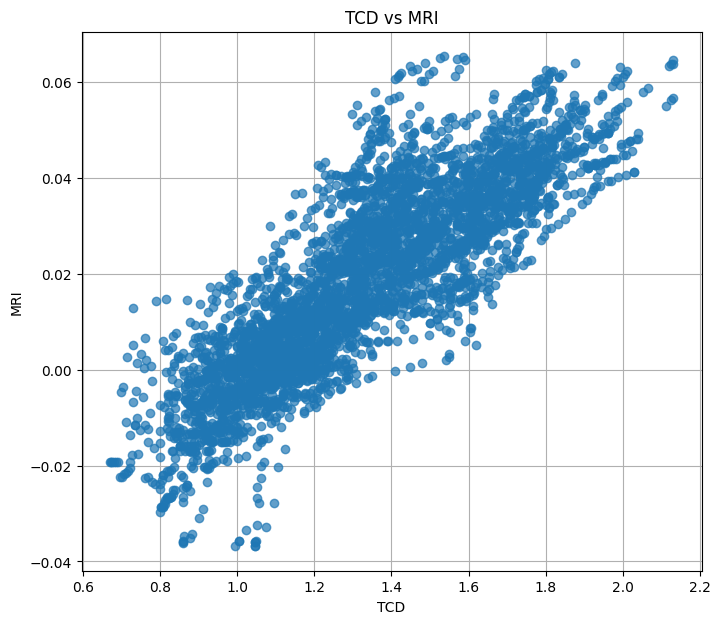

In [42]:
# print the length of the data
print('len(petco2_all)', len(petco2_all))
print('len(petco2_all)', len(tcd_all))
print('len(petco2_all)', len(mri_all))
print('maximum MRI:',mri_all['MRI'].max())
plt.figure(figsize=(8,7))
plt.plot(tcd_all['TCD'],mri_all['MRI'],'o', alpha=0.7)
plt.xlabel('TCD')
plt.ylabel('MRI')
plt.title('TCD vs MRI')
plt.grid()
plt.show()

In [43]:
# 2p davis model
def davis_model_2p(cbf, M, gamma):
    """
    Davis model for fitting BOLD signal to CBF changes.
    
    Parameters:
    cbf (array): Normalized CBF values (CBF(t)/CBF_0).
    M (float): Scaling factor for maximal BOLD signal change.
    gamma (float): Parameter (alpha - beta).

    Returns:
    array: Modeled BOLD signal values.
    """
    return M * (1 - cbf**gamma)

Optimal parameters with uncertainties:
M: 0.400 ± 0.151
γ: -0.192 ± 0.076


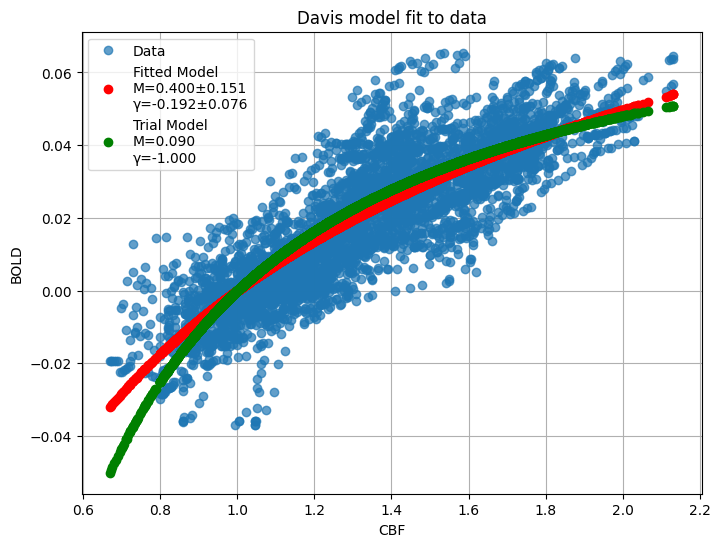

In [44]:
# Fit the model to the data
# Ensure BOLD and CBF are arrays
bold_signal = mri_all.iloc[:,0].values  # BOLD signal from MRI
cbf_signal = tcd_all.iloc[:,0].values  # CBF signal from TCD

# Initial guesses
initial_guess = [0.14, -1.1]  # M ~ 5%, gamma ~ 0.3
# Bounds
lower_bounds = [0, -2.0]  # M ≥ 0.5%, gamma ≥ -1.0
upper_bounds = [0.4, 0.0]  # M ≤ 15%, gamma ≤ 1.0
# Fit the model
popt, pcov = curve_fit(davis_model_2p, cbf_signal, bold_signal, p0=initial_guess, bounds=(lower_bounds, upper_bounds), maxfev=10000)
# Extract the fitted parameters
M_fitted_2p = popt[0]
gamma_fitted_2p = popt[1]
# Calculate the uncertainty
perr = np.sqrt(np.diag(pcov))
#Extract the uncertainty
M_uncertainty_2p = perr[0]
gamma_uncertainty_2p = perr[1]
# Print the optimal parameters
print('Optimal parameters with uncertainties:')
print(f'M: {M_fitted_2p:.3f} ± {M_uncertainty_2p:.3f}')
print(f'γ: {gamma_fitted_2p:.3f} ± {gamma_uncertainty_2p:.3f}')

# Generate the fitted model
bold_fitted_2p = davis_model_2p(cbf_signal, M_fitted_2p, gamma_fitted_2p)

# Trial fitted model with ideal parameters gamma = -1.1 and M = 0.1
gamma_trial = -1
M_trial = 0.09 

bold_fitted_trial = davis_model_2p(cbf_signal, 0.09, -1.1)

# Plot the data and the model
plt.figure(figsize=(8,6))
plt.plot(cbf_signal, bold_signal, 'o', alpha=0.7, label='Data')
plt.plot(cbf_signal, bold_fitted_2p, color="red", label=f"Fitted Model\nM={M_fitted_2p:.3f}±{M_uncertainty_2p:.3f}\nγ={gamma_fitted_2p:.3f}±{gamma_uncertainty_2p:.3f}", marker='o', linestyle='None')
plt.plot(cbf_signal, bold_fitted_trial, color="green", label=f"Trial Model\nM={M_trial:.3f}\nγ={gamma_trial:.3f}", marker='o', linestyle='None')
plt.xlabel('CBF')
plt.ylabel('BOLD')
plt.title('Davis model fit to data')
plt.legend()
plt.grid()
plt.show()

In [45]:

# class DavisModel(LinearModel):
#     """
#     Davis Model: y = M * (1 - x^gamma)

#     Attributes
#     ----------
#     npmax : int
#         number of parameters, which is 2 (M and gamma)
#     """

#     def __init__(self, copy=None, **kwargs):
#         """
#         Initialize the Davis Model with 2 parameters: M and gamma.

#         Parameters
#         ----------
#         copy : DavisModel
#             model to copy
#         fixed : None or dictionary
#             {int: float|Model}
#         """
#         super(DavisModel, self).__init__(2, copy=copy, **kwargs)

#     def copy(self):
#         """ Copy method. """
#         return DavisModel(copy=self)

#     def basePartial(self, xdata, params, parlist=None):
#         """
#         Compute the partial derivatives with respect to each parameter.

#         Parameters
#         ----------
#         xdata : array-like
#             input data points
#         params : array-like
#             current parameter values [M, gamma]
#         parlist : list of int or None
#             indices of active parameters

#         Returns
#         -------
#         partial : numpy.ndarray
#             Partial derivatives with respect to each parameter.
#         """
#         M, gamma = params
#         nxdata = len(xdata)
#         partial = np.zeros((nxdata, self.npmax), dtype=float)

#         # Partial derivative with respect to M
#         partial[:, 0] = 1 - xdata ** gamma

#         # Partial derivative with respect to gamma
#         partial[:, 1] = -M * np.log(xdata) * xdata ** gamma

#         if parlist is not None:
#             return partial[:, parlist]
#         return partial

#     def baseDerivative(self, xdata, params):
#         """
#         Compute the derivative df/dx for the Davis Model.

#         Parameters
#         ----------
#         xdata : array-like
#             input data points
#         params : array-like
#             parameter values [M, gamma]

#         Returns
#         -------
#         derivative : numpy.ndarray
#             Derivative with respect to x.
#         """
#         M, gamma = params
#         return -M * gamma * xdata ** (gamma - 1)

#     def baseName(self):
#         """
#         Provide a string representation of the model.

#         Returns
#         -------
#         str
#             Description of the Davis Model.
#         """
#         return "DavisModel: y = M * (1 - x^gamma)"

#     def baseParameterName(self, k):
#         """
#         Return the name of the k-th parameter.

#         Parameters
#         ----------
#         k : int
#             Index of the parameter.

#         Returns
#         -------
#         str
#             Name of the parameter.
#         """
#         return ["M", "gamma"][k]

#     def baseParameterUnit(self, k):
#         """
#         Return the unit of the k-th parameter.

#         Parameters
#         ----------
#         k : int
#             Index of the parameter.

#         Returns
#         -------
#         str
#             Unit of the parameter.
#         """
#         return "unitless"  # Update if specific units are needed


# # Initialize the model
# davis_model = DavisModel()
# print(davis_model)

# # Define Gaussian priors for M and gamma
# M_prior = GaussPrior(center=0.2, scale=0.1, limits=[0,1])
# gamma_prior = GaussPrior(center=-0.9, scale=0.2, limits=[-2,0])
# print(M_prior)
# print(gamma_prior)

# # set each prior using BayesicFitting's setPrior method
# davis_model.setPrior(0,M_prior)
# davis_model.setPrior(1,gamma_prior)

# # Initialize the NestedSampler
# evidence = nested_sampler = NestedSampler(
#                                         xdata=cbf_signal,
#                                         model=davis_model,
#                                         ydata=bold_signal,
#                                         weights=None, 
#                                         seed=1000 )

# # Run the nested sampler
# nested_sampler.sample( plot=True )

# sl = nested_sampler.samples
# par = sl.parameters
# std = sl.stdevs
# print( "             p1       p2       ")
# print( "params  ", fmt( par, max=None ) )
# print( "stdevs  ", fmt( std, max=None ) )
# pal = par.copy()
# stl = std.copy()
# print( "params  ", fmt( pal, max=None ) )
# print( "stdevs  ", fmt( stl, max=None ) )
# print( "scale   ", fmt( sl.scale ), " +-", fmt( sl.stdevScale ) )

# # isolate the parameters
# M_fitted_bayes = pal[0]
# gamma_fitted_bayes = pal[1]

# # Calculate the uncertainty
# M_uncertainty_bayes = stl[0]
# gamma_uncertainty_bayes = stl[1]

# print("PAL")
# print(pal)

# # Print the optimal parameters
# print('Optimal parameters with uncertainties:')
# print(f'M: {M_fitted_bayes:.3f} ± {M_uncertainty_bayes:.3f}')
# print(f'γ: {gamma_fitted_bayes:.3f} ± {gamma_uncertainty_bayes:.3f}')

In [46]:
# # # Use bayesian model fitting
# # # define the 4p logistic model
# # davis_mod = DavisModel()

# # # M
# # davis_mod.setPrior( 0, prior=GaussPrior(center=0.09, scale=0.15, limits=[0,1])) #M
# # # gamma
# # davis_mod.setPrior( 1, prior=GaussPrior(center=-1, scale=0.15, limits=[-2,0])) #gamma


# # # define NestedSampler
# # ns = NestedSampler( cbf_signal, davis_mod, bold_signal, weights=None, seed=1301 )
# # # set limits on the noise scale of the distribution
# # ns.distribution.setLimits( [0.01,100] )
# # # run NestedSampler
# # evi = ns.sample( plot=True )

# # print(davis_mod.getPrior(0))
# # print(davis_mod.getPrior(1))

# result_2p = davis_model_2p(cbf_signal, M_fitted_bayes, gamma_fitted_bayes)
# result_bayes = davis_model.result(cbf_signal, [M_fitted_bayes, gamma_fitted_bayes])
# print("davis_model_2p result:", result_2p)
# print("davis_model.result result:", result_bayes)

# print("raw test")
# raw_2p = M_fitted_bayes * (1 - cbf_signal ** gamma_fitted_bayes)
# raw_bayes = davis_model.result(cbf_signal, [M_fitted_bayes, gamma_fitted_bayes])
# print("Raw computation 2p:", raw_2p)
# print("Raw computation Bayesian:", raw_bayes)

In [47]:
# # Plot the data and the model
# plt.figure(figsize=(8,6))
# plt.plot(cbf_signal, bold_signal, 'o', alpha=0.7, label='Data', color='black')
# plt.plot(cbf_signal, bold_fitted_2p, color="red", label=f"Fitted Model\nM={M_fitted_2p:.3f}±{M_uncertainty_2p:.3f}\nγ={gamma_fitted_2p:.3f}±{gamma_uncertainty_2p:.3f}", marker='o', linestyle='None')
# plt.plot(cbf_signal, bold_fitted_trial, color="green", label=f"Example Model\nM={M_trial:.3f}\nγ={gamma_trial:.3f}", marker='o', linestyle='None')
# # plot the bayesian fit as well
# plt.plot(cbf_signal, davis_model.result(cbf_signal, pal), color="blue", label=f"Bayesian Fit\nM={M_fitted_bayes:.3f}±{M_uncertainty_bayes:.3f}\nγ={gamma_fitted_bayes:.3f}±{gamma_uncertainty_bayes:.3f}", marker='o', linestyle='None')
# plt.plot(cbf_signal, davis_model_2p(cbf_signal, M_fitted_bayes, gamma_fitted_bayes), color="blue", label=f"Bayesian Fit\nM={M_fitted_bayes:.3f}±{M_uncertainty_bayes:.3f}\nγ={gamma_fitted_bayes:.3f}±{gamma_uncertainty_bayes:.3f}", marker='o', linestyle='None')
# plt.xlabel('CBF')
# plt.ylabel('BOLD')
# plt.title('Davis model fit to data')
# plt.legend()
# plt.grid()
# plt.show()

In [48]:
# # try fitting the model to only the BOLD data greater than 0
# # define an array of indices where the BOLD signal is greater than 0
# bold_signal_gt0 = bold_signal[bold_signal>0]
# cbf_signal_gt0 = cbf_signal[bold_signal>0]

# # Fit the model
# popt_gt0, pcov_gt0 = curve_fit(davis_model_2p, cbf_signal_gt0, bold_signal_gt0, p0=initial_guess, bounds=(lower_bounds, upper_bounds))

# # Extract the fitted parameters
# M_fitted_gt0 = popt_gt0[0]
# gamma_fitted_gt0 = popt_gt0[1]
# # Calculate the uncertainty
# perr_gt0 = np.sqrt(np.diag(pcov_gt0))
# #Extract the uncertainty
# M_uncertainty_gt0 = perr_gt0[0]
# gamma_uncertainty_gt0 = perr_gt0[1]

# # Print the optimal parameters
# print('Optimal parameters with uncertainties for BOLD > 0:')
# print(f'M: {M_fitted_gt0:.3f} ± {M_uncertainty_gt0:.3f}')
# print(f'γ: {gamma_fitted_gt0:.3f} ± {gamma_uncertainty_gt0:.3f}')

# # Generate the fitted model
# bold_fitted_gt0 = davis_model_2p(cbf_signal_gt0, M_fitted_gt0, gamma_fitted_gt0)

# # Plot the data and the model
# plt.figure(figsize=(8,6))
# plt.plot(cbf_signal_gt0, bold_signal_gt0, 'o', alpha=0.7, label='Data')
# plt.plot(cbf_signal_gt0, bold_fitted_gt0, color="red", label=f"Fitted Model\nM={M_fitted_gt0:.3f}±{M_uncertainty_gt0:.3f}\nγ={gamma_fitted_gt0:.3f}±{gamma_uncertainty_gt0:.3f}")
# plt.xlabel('CBF')
# plt.ylabel('BOLD')
# plt.title('Davis model fit to data (BOLD > 0)')
# plt.legend()
# plt.grid()
# plt.show()


In [49]:
# # Define the Davis model
# def davis_model_3p(cbf, M, gamma, k):
#     """
#     Davis model for fitting BOLD signal to CBF changes.
    
#     Parameters:
#     cbf (array): Normalized CBF values (CBF(t)/CBF_0).
#     M (float): Scaling factor for maximal BOLD signal change.
#     gamma (float): Parameter (alpha - beta).

#     Returns:
#     array: Modeled BOLD signal values.
#     """
#     return M * (1 - (k*cbf**(gamma)))

In [50]:
# # Fit the model to the data
# # Ensure BOLD and CBF are arrays
# bold_signal = mri_all.iloc[:,0].values  # BOLD signal from MRI
# cbf_signal = tcd_all.iloc[:,0].values  # CBF signal from TCD

# # Initial guesses
# initial_guess = [0.1, -1.1, 1]  # M ~ 5%, gamma ~ 0.3
# # Bounds
# lower_bounds = [0, -2.0, 0.5]  # M ≥ 0.5%, gamma ≥ -1.0
# upper_bounds = [100.0, 1.0, 1.2]  # M ≤ 15%, gamma ≤ 1.0

# # Use in curve_fit
# popt, pcov = curve_fit(davis_model_3p, cbf_signal, bold_signal, 
#                        p0=initial_guess, bounds=(lower_bounds, upper_bounds), 
#                        maxfev=1000)

# # Extract fitted parameters and their uncertainties
# M_fitted, gamma_fitted, k_fitted = popt
# M_uncertainty, gamma_uncertainty, k_uncertainty = np.sqrt(np.diag(pcov))

In [51]:
# #Plot the fitted model
# # Generate fitted BOLD values
# bold_fitted = davis_model_3p(cbf_signal, M_fitted, gamma_fitted, k_fitted)

# fig_davis_fit =plt.figure(figsize=(8, 6))
# plt.scatter(cbf_signal, bold_signal, label="Data", alpha=0.7)
# plt.plot(cbf_signal, bold_fitted, color="red", label=f"Fitted Model\nM={M_fitted:.3f}±{M_uncertainty:.3f}\nγ={gamma_fitted:.3f}±{gamma_uncertainty:.3f}\nk={k_fitted:.3f}±{k_uncertainty:.3f}", marker='o', linestyle='None')
# plt.xlabel("CBV(t) / CBV_0 (Normalized TCD)")
# plt.ylabel("BOLD Signal (MRI)")
# plt.title("Davis Model Fitting")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Print fitted parameters
# print(f"Fitted Parameters:")
# print(f"M = {M_fitted:.3f} ± {M_uncertainty:.3f}")
# print(f"γ = {gamma_fitted:.3f} ± {gamma_uncertainty:.3f}")

In [52]:
# # Assess the goodness of fit using the coefficient of determination (R^2) for the least squares fit and the bayesian fit
# # Least squares fit
# # Calculate the residuals
# residuals_ls = bold_signal - bold_fitted_2p
# # Calculate the total sum of squares
# tss = np.sum((bold_signal - np.mean(bold_signal))**2)
# # Calculate the sum of squares of residuals
# ssr = np.sum(residuals_ls**2)
# # Calculate the coefficient of determination
# r2_ls = 1 - ssr/tss
# print(f"R^2 for least squares fit: {r2_ls:.3f}")
# print(f"Some of squares of residuals of least squares fit: {ssr:.3f}")

# # Bayesian fit
# # Calculate the residuals
# residuals_bayes = bold_signal - davis_model.result(cbf_signal, pal)
# # Calculate the total sum of squares
# tss = np.sum((bold_signal - np.mean(bold_signal))**2)
# # Calculate the sum of squares of residuals
# ssr = np.sum(residuals_bayes**2)
# # Calculate the coefficient of determination
# r2_bayes = 1 - ssr/tss
# print(f"R^2 for Bayesian fit: {r2_bayes:.3f}")
# print(f"Some of squares of residuals of Bayesian fit: {ssr:.3f}")

# # Residuals of trial model
# residuals_trial = bold_signal - bold_fitted_trial
# # Calculate the total sum of squares
# tss = np.sum((bold_signal - np.mean(bold_signal))**2)
# # Calculate the sum of squares of residuals
# ssr = np.sum(residuals_trial**2)
# # Calculate the coefficient of determination
# r2_trial = 1 - ssr/tss
# print(f"R^2 for trial model: {r2_trial:.3f}")
# print(f"Some of squares of residuals of trial model: {ssr:.3f}")

Fixed gamma: -1.1
max R^2 value: 0.7010331692611862
M value for max R^2 value: 0.08367346938775509
Fixed gamma: -1.0
max R^2 value: 0.7043483122432941
M value for max R^2 value: 0.09142857142857143
Fixed gamma: -0.9
max R^2 value: 0.7078250234997436
M value for max R^2 value: 0.09918367346938775
Fixed gamma: -1.2
max R^2 value: 0.696250147899004
M value for max R^2 value: 0.07979591836734694


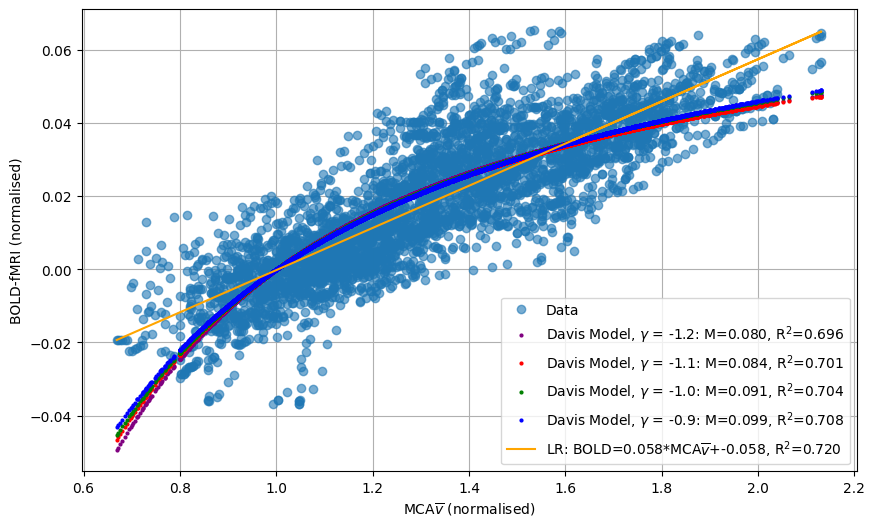

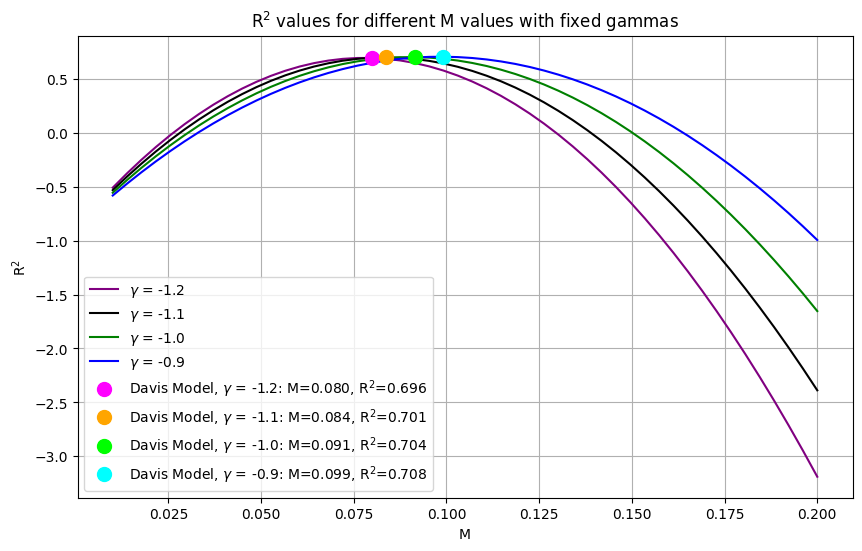

In [53]:
# set gamma to gamma_fixed and then loop throu M from 0.01 to 0.20 and plot them along with the data and the R^2 value for each fit
gamma_fixed = -1.1 #(beta of 1.3 and alpha of 0.2)
gamma_fixed_2 = -1.0
gamma_fixed_3 = -0.9
gamma_fixed_4 = -1.2
M_vals = np.linspace(0.01, 0.20, 50)
ssr_vals = []
r2_vals = []
r2_vals_2 = []
r2_vals_3 = []
r2_vals_4 = []

# Loop through M values
for M in M_vals:
    # Calculate the fitted BOLD signal
    bold_fitted = davis_model_2p(cbf_signal, M, gamma_fixed)
    # Calculate the residuals
    residuals = bold_signal - bold_fitted
    # Calculate the total sum of squares
    tss = np.sum((bold_signal - np.mean(bold_signal))**2)
    # Calculate the sum of squares of residuals
    ssr = np.sum(residuals**2)
    # Append the sum of squares of residuals to the list
    ssr_vals.append(ssr)
    # Calculate the coefficient of determination
    r2 = 1 - ssr/tss
    r2_vals.append(r2)

    # Calculate the fitted BOLD signal
    bold_fitted_2 = davis_model_2p(cbf_signal, M, gamma_fixed_2)
    # Calculate the coefficient of determination
    r2_2 = 1 - np.sum((bold_signal - bold_fitted_2)**2)/tss
    r2_vals_2.append(r2_2)

    # Calculate the fitted BOLD signal
    bold_fitted_3 = davis_model_2p(cbf_signal, M, gamma_fixed_3)
    # Calculate the coefficient of determination
    r2_3 = 1 - np.sum((bold_signal - bold_fitted_3)**2)/tss
    r2_vals_3.append(r2_3)

    # Calculate the fitted BOLD signal
    bold_fitted_4 = davis_model_2p(cbf_signal, M, gamma_fixed_4)
    # Calculate the coefficient of determination
    r2_4 = 1 - np.sum((bold_signal - bold_fitted_4)**2)/tss
    r2_vals_4.append(r2_4)

print("Fixed gamma:", gamma_fixed)
print("max R^2 value:", max(r2_vals))
print("M value for max R^2 value:", M_vals[r2_vals.index(max(r2_vals))])

print("Fixed gamma:", gamma_fixed_2)
print("max R^2 value:", max(r2_vals_2))
print("M value for max R^2 value:", M_vals[r2_vals_2.index(max(r2_vals_2))])

print("Fixed gamma:", gamma_fixed_3)
print("max R^2 value:", max(r2_vals_3))
print("M value for max R^2 value:", M_vals[r2_vals_3.index(max(r2_vals_3))])

print("Fixed gamma:", gamma_fixed_4)
print("max R^2 value:", max(r2_vals_4))
print("M value for max R^2 value:", M_vals[r2_vals_4.index(max(r2_vals_4))])

# Plot the data and the models with different M values
plt.figure(figsize=(10,6))
plt.plot(cbf_signal, bold_signal, 'o', alpha=0.6, label='Data')
# for i, M in enumerate(M_vals):
#     bold_fitted = davis_model_2p(cbf_signal, M, gamma_fixed)
#     plt.plot(cbf_signal, bold_fitted, label=f"M={M:.3f}, R^2={r2_vals[i]:.3f}", marker='o', linestyle='None', alpha=0.6)
#highlight the model with the highest R^2 value
# plot the model with the highest R^2 value for gamma = -1.2
bold_fitted_4 = davis_model_2p(cbf_signal, M_vals[r2_vals_4.index(max(r2_vals_4))], gamma_fixed_4)
plt.plot(cbf_signal, bold_fitted_4, color='purple', label=f"Davis Model, $\gamma$ = {gamma_fixed_4}: M={M_vals[r2_vals_4.index(max(r2_vals_4))]:.3f}, R$^{2}$={max(r2_vals_4):.3f}", marker='o', linestyle='None', markersize=2)
bold_fitted = davis_model_2p(cbf_signal, M_vals[r2_vals.index(max(r2_vals))], gamma_fixed)
plt.plot(cbf_signal, bold_fitted, color='red', label=f"Davis Model, $\gamma$ = {gamma_fixed}: M={M_vals[r2_vals.index(max(r2_vals))]:.3f}, R$^{2}$={max(r2_vals):.3f}", marker='o', linestyle='None', markersize=2)
# plot the model with the highest R^2 value for gamma = -1.0
bold_fitted_2 = davis_model_2p(cbf_signal, M_vals[r2_vals_2.index(max(r2_vals_2))], gamma_fixed_2)
plt.plot(cbf_signal, bold_fitted_2, color='green', label=f"Davis Model, $\gamma$ = {gamma_fixed_2}: M={M_vals[r2_vals_2.index(max(r2_vals_2))]:.3f}, R$^{2}$={max(r2_vals_2):.3f}", marker='o', linestyle='None', markersize=2)
# plot the model with the highest R^2 value for gamma = -0.9
bold_fitted_3 = davis_model_2p(cbf_signal, M_vals[r2_vals_3.index(max(r2_vals_3))], gamma_fixed_3)
plt.plot(cbf_signal, bold_fitted_3, color='blue', label=f"Davis Model, $\gamma$ = {gamma_fixed_3}: M={M_vals[r2_vals_3.index(max(r2_vals_3))]:.3f}, R$^{2}$={max(r2_vals_3):.3f}", marker='o', linestyle='None', markersize=2)


# calculate the linear regression of the cbf signal and bold signal
m, b = np.polyfit(cbf_signal, bold_signal, 1)
#calcuate the R^2 value
tss = np.sum((bold_signal - np.mean(bold_signal))**2)
r2_ls = 1 - np.sum((bold_signal - (m*cbf_signal + b))**2)/tss
plt.plot(cbf_signal, m*cbf_signal + b, color='orange', label=f"LR: BOLD={m:.3f}*MCA$\overline{{v}}$+{b:.3f}, R$^{2}$={r2_ls:.3f}", linestyle='-')

plt.xlabel('MCA$\overline{{v}}$ (normalised)')
plt.ylabel('BOLD-fMRI (normalised)')
#plt.title('Davis model fit to data with fixed gammas')
plt.legend()
plt.grid()
plt.show()

# Plot the R^2 values
plt.figure(figsize=(10,6))
plt.plot(M_vals, r2_vals_4, '-', color='purple', label=f"$\gamma$ = {gamma_fixed_4}")
plt.plot(M_vals, r2_vals, '-', color='black', label=f"$\gamma$ = {gamma_fixed}")
plt.plot(M_vals, r2_vals_2, '-', color='green', label=f"$\gamma$ = {gamma_fixed_2}")
plt.plot(M_vals, r2_vals_3, '-', color='blue', label=f"$\gamma$ = {gamma_fixed_3}")
# plot the model with the highest R^2 value for gamma = -1.2
plt.plot(M_vals[r2_vals_4.index(max(r2_vals_4))], max(r2_vals_4), 'o', color='fuchsia', label=f"Davis Model, $\gamma$ = {gamma_fixed_4}: M={M_vals[r2_vals_4.index(max(r2_vals_4))]:.3f}, R$^{2}$={max(r2_vals_4):.3f}", markersize=10)
#highlight the model with the highest R^2 value
plt.plot(M_vals[r2_vals.index(max(r2_vals))], max(r2_vals), 'o', color='orange', label=f"Davis Model, $\gamma$ = {gamma_fixed}: M={M_vals[r2_vals.index(max(r2_vals))]:.3f}, R$^{2}$={max(r2_vals):.3f}", markersize=10)
# plot the model with the highest R^2 value for gamma = -1.0
plt.plot(M_vals[r2_vals_2.index(max(r2_vals_2))], max(r2_vals_2), 'o', color='lime', label=f"Davis Model, $\gamma$ = {gamma_fixed_2}: M={M_vals[r2_vals_2.index(max(r2_vals_2))]:.3f}, R$^{2}$={max(r2_vals_2):.3f}", markersize=10)
# plot the model with the highest R^2 value for gamma = -0.9
plt.plot(M_vals[r2_vals_3.index(max(r2_vals_3))], max(r2_vals_3), 'o', color='cyan', label=f"Davis Model, $\gamma$ = {gamma_fixed_3}: M={M_vals[r2_vals_3.index(max(r2_vals_3))]:.3f}, R$^{2}$={max(r2_vals_3):.3f}", markersize=10)


plt.xlabel('M')
plt.ylabel('R$^{2}$')
plt.title('R$^{2}$ values for different M values with fixed gammas')
plt.legend()
plt.grid()
plt.show()